In [1]:
import os
import numpy as np
from mypy_extensions import TypedDict

We import some auxiliary libraries that help us to build the pipeline.

In [2]:
from cfg import conabio_ml
from conabio_ml.pipeline import Pipeline
from conabio_ml.trainer.keras_bcknd import KerasTrainer, KerasTrainerConfig, TENSORBOARD_CALLBACK

Using TensorFlow backend.


We also import the model we want to train using the Conabio_ML pipeline

In [3]:
from model import MNIST_Classifier

We create some synthetic data for test purposes. 

In a complete Pipeline example, it's desirable to load a dataset like in (reference) using the Dataset component of the Conabio_ML API, defined in <a src="https://bitbucket.org/conabio_cmd/conabio_ml/src/CONML-45-definicin-del-esquema-de-entren/conabio_ml/datasets/">Datasets</a>


In [4]:
def create_synth_data(num_samples: int = 10000) -> TypedDict:
    x_train = np.random.randint(1000, size=(num_samples, 10))
    y_train = np.random.randint(2, size=(num_samples, 2))

    x_validation = np.random.randint(1000, size=(int(num_samples/10), 10))
    y_validation = np.random.randint(2, size=(int(num_samples/10), 2))

    return {
        "train": (x_train, y_train),
        "validation": (x_validation, y_validation)}

In [5]:
results_path = os.path.join('./results', 'MNIST_AE')

pipeline = Pipeline(results_path)\
    .add_process(name="create_synth_data",
                 action=create_synth_data,
                 args={
                     "num_samples": 10000
                 })\
    .add_process(name="create_MNIST_Classifier",
                 action=MNIST_Classifier.create,
                 args={
                     'model_config': {
                         'MNIST_Classifier': {
                             'layers': {
                                 'embedding_layer': {
                                     'input_dim': 1000,
                                     'output_dim': 50,
                                     'window': 10
                                 },
                                 'dense_layer': {
                                     'units': 2,
                                     'activation': 'softmax'
                                 }
                             }
                         }
                     }})\
    .add_process(name="create_keras_trainer_cfg",
                 action=KerasTrainerConfig.create,
                 args={
                     'checkpoint_dir': os.path.join(results_path, "checkpoints"),
                     'log_dir': os.path.join(results_path, "log_dir")
                 })\
    .add_process(name="train_MNIST_model_synth_data",
                 action=KerasTrainer.train,
                 inputs_from_processes=['create_synth_data',
                                        'create_MNIST_Classifier',
                                        'create_keras_trainer_cfg'],
                 args={
                     'train_config': {
                         'MNIST_Classifier': {
                             'optimizer': {
                                 'rms_prop': {
                                     'learning_rate': {
                                         'constant': {
                                             'learning_rate': 1e-3
                                         }
                                     }
                                 }
                             },
                             'loss': {
                                 'binary_crossentropy': {}
                             },
                             'metrics':['accuracy'],
                             'epochs': 50,
                             'batch_size': 256,
                             'shuffle': True,
                             'callbacks': {
                                 TENSORBOARD_CALLBACK: {
                                     'log_dir': os.path.join(results_path, "logie"),
                                     'batch_size': 32
                                 }
                             }
                         }
                     }
                 })

In [6]:
pipeline.run()

W1016 13:43:01.660342 4482501952 deprecation_wrapper.py:119] From /Users/rrivera/Documents/mina.de.carbon/projects/conabio_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1016 13:43:01.674629 4482501952 deprecation_wrapper.py:119] From /Users/rrivera/Documents/mina.de.carbon/projects/conabio_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1016 13:43:01.677991 4482501952 deprecation_wrapper.py:119] From /Users/rrivera/Documents/mina.de.carbon/projects/conabio_ml/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1016 13:43:01.927583 4482501952 deprecation_wrapper.py:119] From /Users/rrivera/Documents/mina.de.carbon/projects/conabio_ml/lib/python3.7/site-package

Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 0s 27us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00001: val_loss improved from inf to 0.69307, saving model to ./results/MNIST_AE/checkpoints/MNIST_Classifier_model.hdf5
Epoch 2/50
10000/10000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00002: val_loss improved from 0.69307 to 0.69307, saving model to ./results/MNIST_AE/checkpoints/MNIST_Classifier_model.hdf5
Epoch 3/50
10000/10000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00003: val_loss improved from 0.69307 to 0.69307, saving model to ./results/MNIST_AE/checkpoints/MNIST_Classifier_model.hdf5
Epoch 4/50
10000/10000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00004: 

10000/10000 [==============================] - 0s 9us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00039: val_loss did not improve from 0.69307
Epoch 40/50
10000/10000 [==============================] - 0s 9us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00040: val_loss did not improve from 0.69307
Epoch 41/50
10000/10000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00041: val_loss did not improve from 0.69307
Epoch 42/50
10000/10000 [==============================] - 0s 9us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00042: val_loss did not improve from 0.69307
Epoch 43/50
10000/10000 [==============================] - 0s 9us/step - loss: 0.6936 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00043: val_loss did not improve from 0.69307
Epoch 44/50
10000/10000 [==============================] - 0s 8us/s

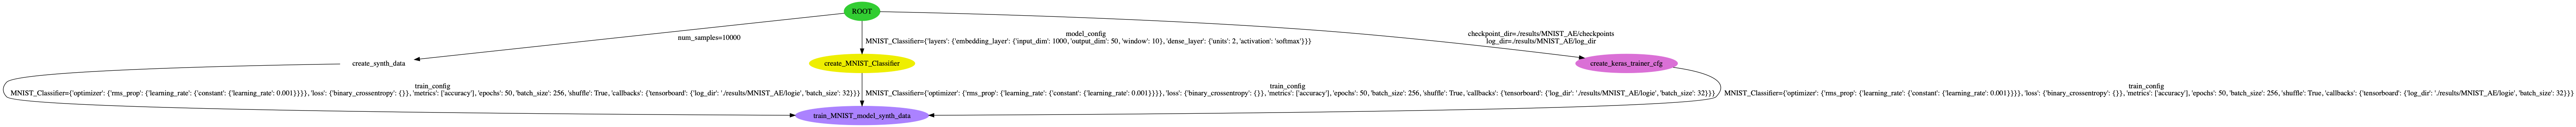

In [7]:
from IPython.display import Image
Image(os.path.join(pipeline.path, "pipeline.png"))

In [8]:
import json

with open(os.path.join(pipeline.path, "pipeline.json"), 'r') as f:
    collections = f.read()
                  
    res = json.loads(collections)

res

{'id': '20191016134301',
 'processes': [{'name': 'create_synth_data',
   'action': 'create_synth_data',
   'inputs_from_processes': ['ROOT'],
   'args': {'num_samples': 10000}},
  {'name': 'create_MNIST_Classifier',
   'action': 'MNIST_Classifier.create',
   'inputs_from_processes': ['ROOT'],
   'args': {'model_config': {'MNIST_Classifier': {'layers': {'embedding_layer': {'input_dim': 1000,
        'output_dim': 50,
        'window': 10},
       'dense_layer': {'units': 2, 'activation': 'softmax'}}}}}},
  {'name': 'create_keras_trainer_cfg',
   'action': 'KerasTrainerConfig.create',
   'inputs_from_processes': ['ROOT'],
   'args': {'checkpoint_dir': './results/MNIST_AE/checkpoints',
    'log_dir': './results/MNIST_AE/log_dir'}},
  {'name': 'train_MNIST_model_synth_data',
   'action': 'KerasTrainer.train',
   'inputs_from_processes': ['create_synth_data',
    'create_MNIST_Classifier',
    'create_keras_trainer_cfg'],
   'args': {'train_config': {'MNIST_Classifier': {'optimizer': {'rms_